<a href="https://colab.research.google.com/github/Faizaa01/Machine_Learning_Fundamentals/blob/main/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons, make_circles, load_breast_cancer, load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error, r2_score

np.random.seed(42)
plt.rcParams['figure.figsize'] = (6, 4)

In [4]:
X_lin, y_lin = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=1.8,
    random_state=42
)
y_lin[:10]

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0])

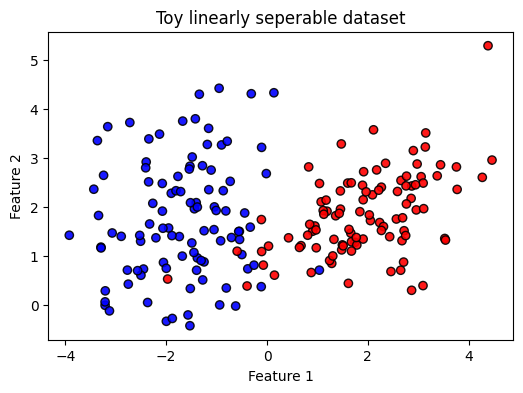

In [10]:
plt.scatter(X_lin[:,0], X_lin[:, 1], c=y_lin, cmap='bwr', edgecolors='k', alpha=0.9 )
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Toy linearly seperable dataset')
plt.show()


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_lin, y_lin, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train_scaled, y_train)

y_pred = svm_linear.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.2f}')

Accuracy: 0.97


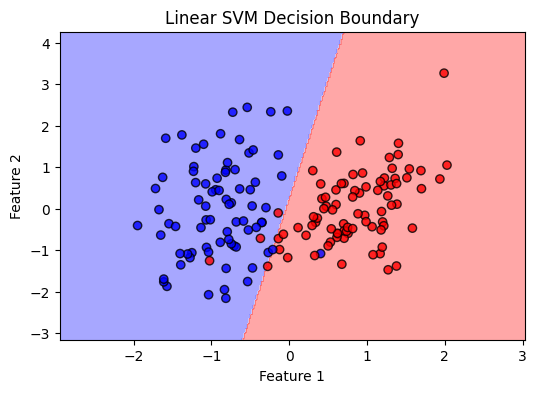

In [14]:
def plot_decision_boundary(model, X, y, title='Decision Boundary'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', alpha=0.8)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(svm_linear, X_train_scaled, y_train, 'Linear SVM Decision Boundary')

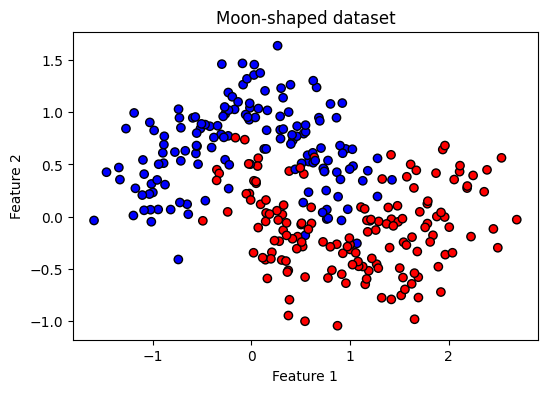

In [15]:
X_moon, y_moon = make_moons(n_samples=300, noise=0.25, random_state=42)

plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon, cmap='bwr', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Moon-shaped dataset')
plt.show()

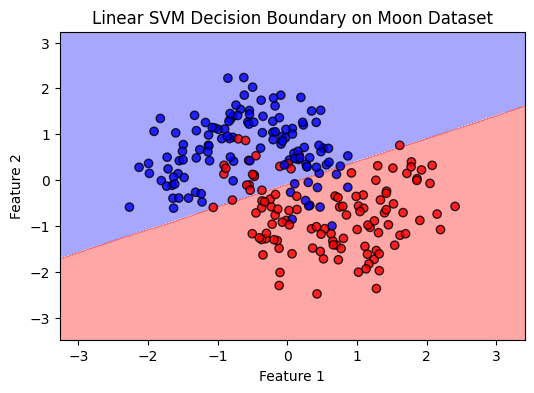

Testing Accuracy: 0.8833333333333333


In [16]:
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moon, y_moon, test_size=0.2, random_state=42)

scaler_moon = StandardScaler()
X_moon_train_scaled = scaler_moon.fit_transform(X_moon_train)
X_moon_test_scaled = scaler_moon.transform(X_moon_test)

svc_linear_moon = SVC(kernel='linear', C=1.0, random_state=42)
svc_linear_moon.fit(X_moon_train_scaled, y_moon_train)
plot_decision_boundary(svc_linear_moon, X_moon_train_scaled, y_moon_train,
                       title='Linear SVM Decision Boundary on Moon Dataset')

print('Testing Accuracy:', accuracy_score(y_moon_test, svc_linear_moon.predict(X_moon_test_scaled)))


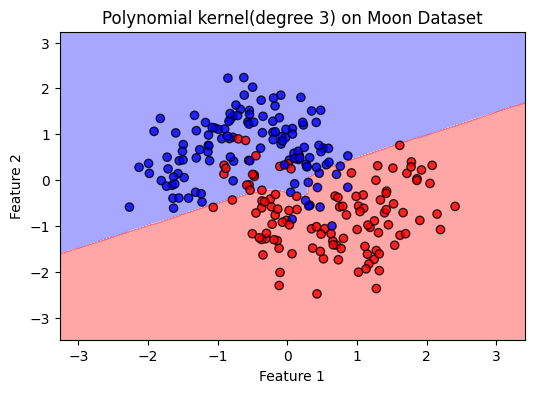

Testing Accuracy: 0.8833333333333333


In [17]:
svc_poly_moon = SVC(kernel='poly', degree=3, C=10.0, gamma='scale', random_state=42)
svc_poly_moon.fit(X_moon_train_scaled, y_moon_train)
plot_decision_boundary(svc_poly_moon, X_moon_train_scaled, y_moon_train,
                       title='Polynomial kernel(degree 3) on Moon Dataset')

print('Testing Accuracy:', accuracy_score(y_moon_test, svc_poly_moon.predict(X_moon_test_scaled)))


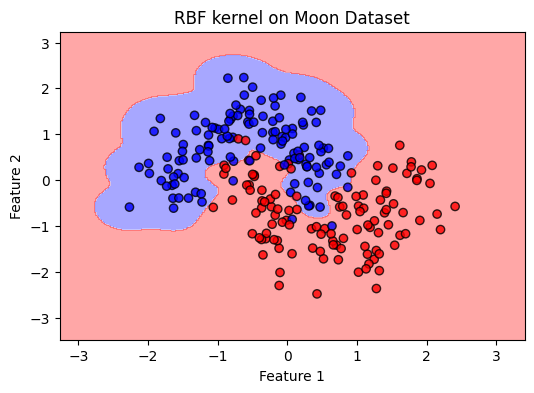

Testing Accuracy: 0.9166666666666666


In [20]:
svc_rbf_moon = SVC(kernel='rbf', C=1.0, gamma=10.0, random_state=42)
svc_rbf_moon.fit(X_moon_train_scaled, y_moon_train)
plot_decision_boundary(svc_rbf_moon, X_moon_train_scaled, y_moon_train,
                       title='RBF kernel on Moon Dataset')

print('Testing Accuracy:', accuracy_score(y_moon_test,
      svc_rbf_moon.predict(X_moon_test_scaled)))


In [23]:
cancer = load_breast_cancer()
X_bc = cancer.data
y_bc = cancer.target

print('Feature shape:', X_bc.shape)
print('Classes:', cancer.target_names)

X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(
    X_bc, y_bc, test_size=0.2, random_state=42, stratify=y_bc
)
scaler_bc = StandardScaler()
X_bc_train_scaled = scaler_bc.fit_transform(X_bc_train)
X_bc_test_scaled = scaler_bc.transform(X_bc_test)

Feature shape: (569, 30)
Classes: ['malignant' 'benign']


In [29]:
svc_bc = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_bc.fit(X_bc_train_scaled, y_bc_train)
y_bc_pred = svc_bc.predict(X_bc_test_scaled)
acc_bc = accuracy_score(y_bc_test, y_bc_pred)
print(f'Accuracy: {acc_bc:.2f}')
print("Classification Report:")
print(classification_report(y_bc_test, y_bc_pred))
cm = confusion_matrix(y_bc_test, y_bc_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
[[41  1]
 [ 1 71]]


In [31]:
def evaluate_svm_c_gamma(X_train, X_test, y_train, y_test, C_values, gamma_values):
  results = []
  for C in C_values:
    for gamma in gamma_values:
      model = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      acc = accuracy_score(y_test, y_pred)
      results.append({'C': C, 'gamma': gamma, 'accuracy':acc})
  return pd.DataFrame(results)

C_values = [0.1, 1.0, 10.0]
gamma_values = ['scale', 0.01, 0.1, 1.0]

df_hyper = evaluate_svm_c_gamma(
    X_bc_train_scaled, X_bc_test_scaled, y_bc_train, y_bc_test, C_values, gamma_values)

df_hyper.sort_values('accuracy', ascending=False)


,C,gamma,accuracy
5,1.0,0.01,0.982456
9,10.0,0.01,0.982456
4,1.0,scale,0.982456
8,10.0,scale,0.973684
6,1.0,0.1,0.956140
1,0.1,0.01,0.956140
0,0.1,scale,0.947368
2,0.1,0.1,0.947368
10,10.0,0.1,0.947368
3,0.1,1.0,0.631579


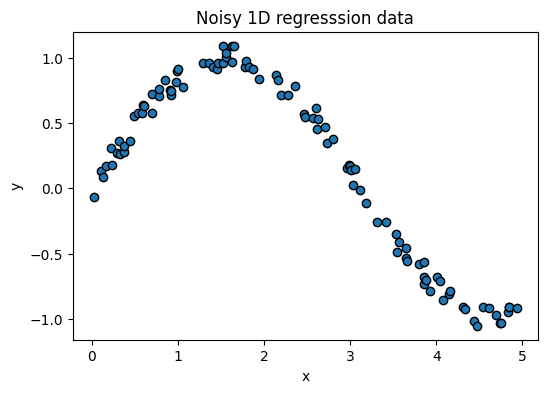

In [33]:
rng = np.random.RandomState(42)
X_reg = np.sort(5 * rng.rand(100, 1), axis=0)
y_reg = np.sin(X_reg).ravel()

y_reg += 0.2 * (rng.rand(y_reg.shape[0]) - 0.5)

plt.scatter(X_reg, y_reg, edgecolors='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Noisy 1D regresssion data')
plt.show()

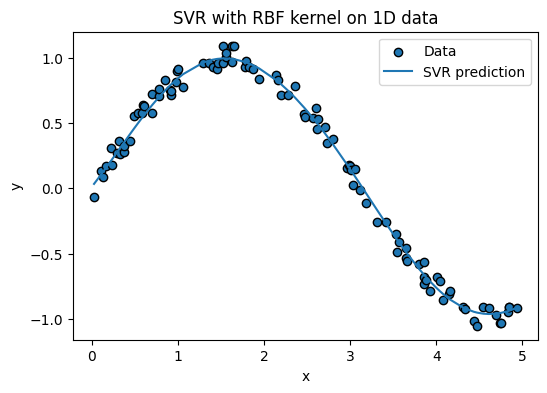

In [34]:
svr_rbf = SVR(kernel='rbf', C=100, gamma='scale', epsilon=.1)
svr_rbf.fit(X_reg, y_reg)

y_reg_pred = svr_rbf.predict(X_reg)
plt.scatter(X_reg, y_reg,  edgecolors='k', label='Data')
plt.plot(X_reg, y_reg_pred, label='SVR prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('SVR with RBF kernel on 1D data')
plt.legend()
plt.show()

In [36]:
mse = mean_squared_error(y_reg, y_reg_pred)
r2 = r2_score(y_reg, y_reg_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 0.00
R^2 Score: 0.99


In [42]:
diabetes = load_diabetes()
X_diab = diabetes.data
y_diab = diabetes.target

print('Feature shape:', X_diab.shape)

X_diab_train, X_diab_test, y_diab_train, y_diab_test = train_test_split(X_diab, y_diab, test_size=0.2, random_state=42)

scaler_diab = StandardScaler()
X_diab_train_scaled = scaler_diab.fit_transform(X_diab_train)
X_diab_test_scaled = scaler_diab.transform(X_diab_test)

svr_diab = SVR(kernel='rbf', C=10.0, epsilon=0.1, gamma='scale')
svr_diab.fit(X_diab_train_scaled, y_diab_train)

y_diab_pred = svr_diab.predict(X_diab_test_scaled)

mse_d = mean_squared_error(y_diab_test, y_diab_pred)
r2_d = r2_score(y_diab_test, y_diab_pred)

print(f'Mean Squared Error: {mse_d:.2f}')
print(f'R^2 Score: {r2_d:.2f}')

Feature shape: (442, 10)
Mean Squared Error: 2682.39
R^2 Score: 0.49
